In [6]:
import sys
sys.path.append("../../")

In [7]:
from delay.delay import *
import delay.calculator as calc
from delay.strategy import fA_HardSkewTo0, fB_HardSkewTo0, showIntervalFunctions
from delay.simulation import Simulation, FunctionType
from delay.regression import linearRegression, Dependence
from delay.value import calculateValue
import pandas as pd

In [3]:
filePrefix = 'lin-skewTo0'
%run csvFilename.py
csvFilename = createCSVFilename(filePrefix)
csvFilename

{'N=20': {'ds': {'tau=1': '../../csv/N=20/lin-skewTo0-ds-tau-1.csv',
   'tau=2': '../../csv/N=20/lin-skewTo0-ds-tau-2.csv',
   'tau=3': '../../csv/N=20/lin-skewTo0-ds-tau-3.csv',
   'tau=4': '../../csv/N=20/lin-skewTo0-ds-tau-4.csv',
   'tau=5': '../../csv/N=20/lin-skewTo0-ds-tau-5.csv',
   'tau=6': '../../csv/N=20/lin-skewTo0-ds-tau-6.csv',
   'tau=20': '../../csv/N=20/lin-skewTo0-ds-tau-20.csv',
   'tau=50': '../../csv/N=20/lin-skewTo0-ds-tau-50.csv'},
  'taus': {'d=1': '../../csv/N=20/lin-skewTo0-taus-d-1.csv',
   'd=2': '../../csv/N=20/lin-skewTo0-taus-d-2.csv',
   'd=3': '../../csv/N=20/lin-skewTo0-taus-d-3.csv',
   'd=20': '../../csv/N=20/lin-skewTo0-taus-d-20.csv',
   'd=50': '../../csv/N=20/lin-skewTo0-taus-d-50.csv',
   'd=150': '../../csv/N=20/lin-skewTo0-taus-d-150.csv'}},
 'N=100': {'ds': {'tau=1': '../../csv/N=100/lin-skewTo0-ds-tau-1.csv',
   'tau=2': '../../csv/N=100/lin-skewTo0-ds-tau-2.csv',
   'tau=3': '../../csv/N=100/lin-skewTo0-ds-tau-3.csv',
   'tau=4': '../../csv

In [17]:
simulation = Simulation(FunctionType.HARD_SKEW_TO0, (0, 0), calculateValue, calc.linear(N=100, w=0.99))
simulation.setN(100)
simulation.setConv(100)
simulation.setDuration(100000000) # 10^8
simulation.setD(20)

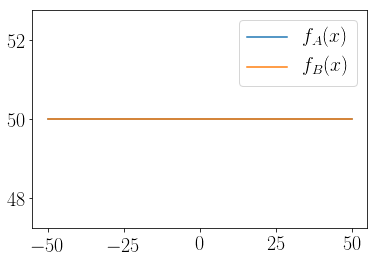

In [6]:
N = 100
showIntervalFunctions(fA_HardSkewTo0, fB_HardSkewTo0, N, d=50)

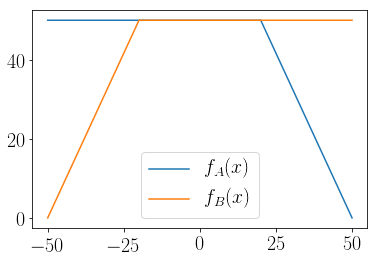

In [18]:
N = 100
showIntervalFunctions(fA_HardSkewTo0, fB_HardSkewTo0, N, d=20)

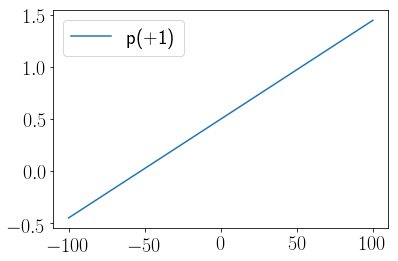

In [19]:
calc.plot(calc.linear(N=100))

µ =  -0.0369035799889631


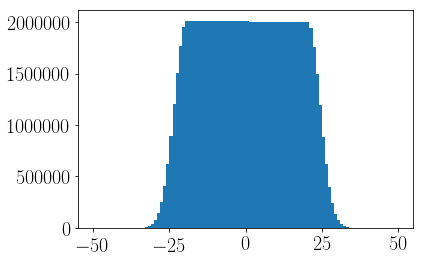

In [20]:
simulation.setTau((0, 0))
simulation.run()
simulation.plotOnlyHistogram('../../../draft/img/results/'+filePrefix+'/histogram0')

µ =  -0.76732458131997


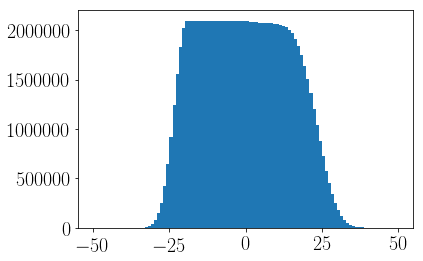

In [21]:
simulation.setTau((20, 0))
simulation.run()
simulation.plotOnlyHistogram('../../../draft/img/results/'+filePrefix+'/histogram-tauA')

µ =  0.6990614493420299


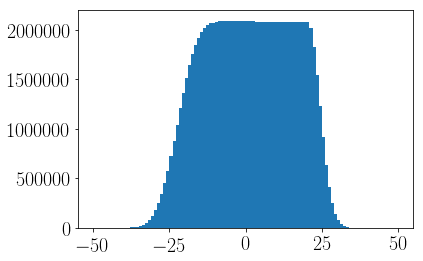

In [22]:
simulation.setTau((0, 20))
simulation.run()
simulation.plotOnlyHistogram('../../../draft/img/results/'+filePrefix+'/histogram-tauB')

In [23]:
simulation.setIterations(10)

In [11]:
taus, mus = [], [] 
simulation.setD(20)

print('d, τ, µ')
for i in range(0, 35):
    tauA = i * 2
    simulation.setTau((tauA, 0))
    simulation.run()
    simulation.systematicInfo()
    taus.append(tauA)
    mus.append(simulation.getAverage())
    

steps = len(taus)
data = {'d': [20]*steps, 'τ': taus, 'µ': mus}
df = pd.DataFrame(data = data)
df.to_csv(csvFilename['taus']);

d, τ, µ
20 ,  0 ,  0.053741983123472684
20 ,  2 ,  -0.3316119879343139
20 ,  4 ,  -0.6075326468127225
20 ,  6 ,  -0.9062038278864825
20 ,  8 ,  -1.2731282355107276
20 ,  10 ,  -1.5815787480853587
20 ,  12 ,  -1.8454299346332725
20 ,  14 ,  -2.228736697071836
20 ,  16 ,  -2.467785044303122
20 ,  18 ,  -2.7829721806236263
20 ,  20 ,  -3.035898111913607
20 ,  22 ,  -3.306043290878698
20 ,  24 ,  -3.581757034446616
20 ,  26 ,  -3.770961760306738
20 ,  28 ,  -3.9760605432361604
20 ,  30 ,  -4.1823464762967575
20 ,  32 ,  -4.383893168793202
20 ,  34 ,  -4.492003083187209
20 ,  36 ,  -4.562848240941762
20 ,  38 ,  -4.740307734650371
20 ,  40 ,  -4.796667982197667
20 ,  42 ,  -4.8468103884422735
20 ,  44 ,  -4.888489030198066
20 ,  46 ,  -4.907499774377546
20 ,  48 ,  -4.93496277879649
20 ,  50 ,  -4.949222178622329
20 ,  52 ,  -4.978950436410406
20 ,  54 ,  -4.974686902865621
20 ,  56 ,  -4.966089778645793
20 ,  58 ,  -5.005362893071571
20 ,  60 ,  -4.93980475779683
20 ,  62 ,  -4.98705735401

Mean squared error: 0.00
Variance score: 1.00
Line: -0.04x + 0.092177


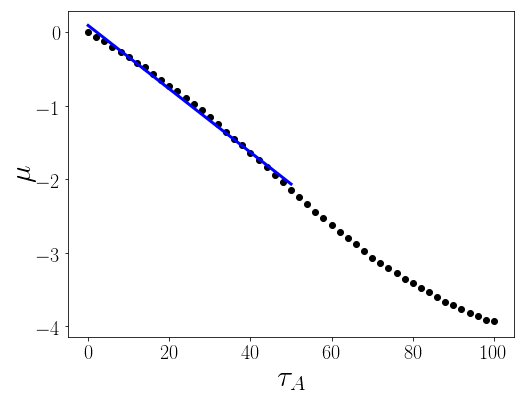

In [7]:
df = pd.read_csv(csvFilename['taus'], sep=',')
toDict = df.to_dict('l')
taus = toDict['τ']
mus = toDict['µ']

linearRegression(taus, mus, Dependence.TAU, '../../../draft/img/results/'+filePrefix+'/tau-d50', forHalfN=True, N=100);

In [13]:
ds, mus = [], []
simulation.setTau((50, 0))

print('d, τ, µ')
_ = np.arange(0, 48, step=2)
_ = np.union1d(_, np.arange(47, 51))
_ = np.union1d(_, np.arange(52, 72, step=2))
for d in _:
    simulation.setD(d)
    simulation.run()
    simulation.systematicInfo()
    ds.append(d)
    mus.append(simulation.getAverage())
    
steps = len(ds)
data = {'d': ds, 'τ': [50]*steps, 'µ': mus}
df = pd.DataFrame(data = data)
df.to_csv(csvFilename['ds']);

d, τ, µ


KeyboardInterrupt: 

Mean squared error: 0.02
Variance score: 0.93
Line: -0.04x + 0.020768


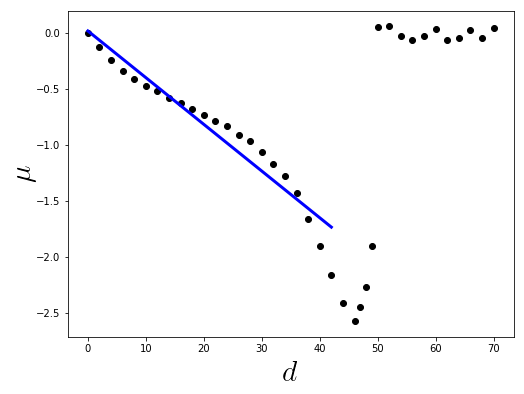

In [6]:
df = pd.read_csv(csvFilename['ds'], sep=',')
toDict = df.to_dict('l')
ds = toDict['d']
mus = toDict['µ']

linearRegression(ds, mus, Dependence.D, '../../../draft/img/results/'+filePrefix+'/d-tau50', forHalfN=True, N=100);

Mean squared error: 0.12
Variance score (R^2): 0.94
Line: -0.03τ + -0.372587


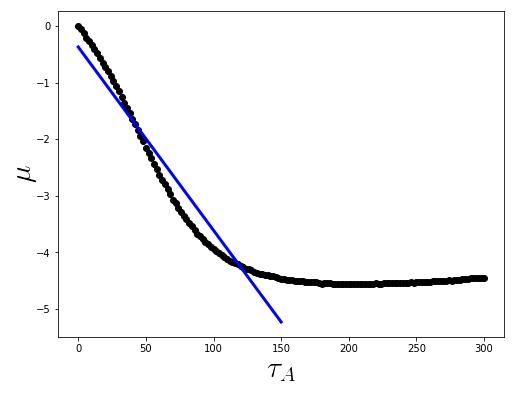

In [9]:
df = pd.read_csv('../../csv/N=100/' + filePrefix + '-taus-d20.csv', sep=',')
toDict = df.to_dict('l')
taus = toDict['τ']
mus = toDict['µ']

linearRegression(taus, mus, Dependence.TAU, '../../../draft/img/results/'+filePrefix+'/N=100/taus-d20-more', showFit=True, smallerThan=150
);

In [4]:
filePrefix

'lin-skewTo0'